<a href="https://colab.research.google.com/github/titocampos/estudo-crm/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashin MNIST

Neste desafio vamos criar uma rede para reconhecher diferentes itens de vestuário. 

In [1]:
 %tensorflow_version 2.x 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.2.0-rc1


Usaremos um conjunto de dados comum chamado Fashion MNIST. Ele contém 70.000 itens de vestuário em 10 categorias diferentes. Cada item de roupa está em uma imagem em escala de cinza de 28x28. Você pode importar estes dados estão disponiveis diretamente dos datasets do pacote tensorflow, como mostrado abaixo

In [0]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data();

As imagens são matrizes 28 $\times$ 28, com valores de pixel no intervalo `[0, 255]`. Os *labels* são uma matriz de números inteiros, no intervalo `[0, 9]`. Correspondem à *classe* de roupas que a imagem representa

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagem é mapeada para um único rótulo. Como os *nomes de classe* não estão incluídos no conjunto de dados, armazene-os aqui para usar mais tarde ao plotar as imagens. E aproveite para normalizar os valores dos dados.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
               
training_images  = training_images / 255.0
test_images = test_images / 255.0

Vamos imprimir algumas imagens com sua classe, para ver como são ... 

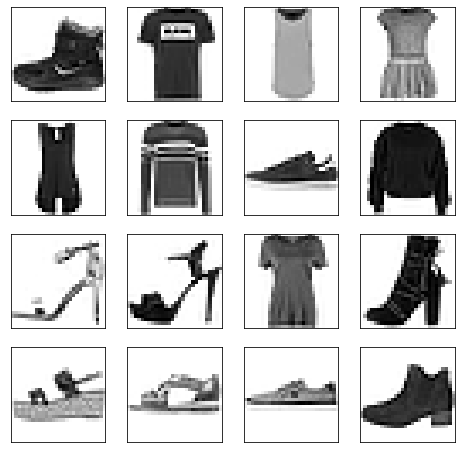

In [4]:
i = 0
fig = plt.figure(figsize=(8,8))
for idx in range(16):
  image = training_images[idx]
  plt.subplot(4, 4, i+1)
  plt.imshow(image,  cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,  cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[idx]], fontsize=12, color='white')
  i+=1

plt.show()

Pronto agora vamos criar nosso modelo

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequencial: define uma SEQUÊNCIA de camadas na rede neural

Flatten: Lembra-se anteriormente nossas imagens eram quadradas? Essa camada transformará os dados em um conjunto unidimensional.

Dense: Indica que todos os neuronios da camada anterior sao conectados a camada.

Cada camada de neurônios precisa de uma função de ativação para dizer a eles o que fazer. Existem muitas opções, como por exemplo:

- **Relu** significa efetivamente "Se X> 0 retorna X, senão retorna 0" - então, o que ele faz apenas passa valores 0 ou mais para a próxima camada na rede.

- **Softmax** pega um conjunto de valores e escolhe efetivamente o maior, por exemplo, se a saída da última camada se parecer com [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], ela transforma em [0,0,0,0,1,0,0,0,0]. O objetivo é economizar codificação!

A próxima coisa a fazer, agora que o modelo está definido, é realmente construí-lo. Você faz isso compilando-o com uma função otimizadora e depois,  treinando-o chamando o metodo "fit".

In [6]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5);

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4976 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3729 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3351 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.8926


Depois de concluir o treinamento - você verá um valor de precisão no final da época final. Pode parecer algo como 0,8926. Isso indica que sua rede neural tem cerca de 89% de precisão na classificação dos dados de treinamento. Ou seja, descobriu uma correspondência de padrões entre a imagem e os rótulos que funcionavam 89% do tempo. Não é ótimo, mas não é ruim, considerando que ele foi treinado apenas por cinco épocas e realizado rapidamente.

Mas como isso funcionaria com dados invisíveis? É por isso que temos as imagens de teste. Podemos chamar model.evaluate e passar os dois conjuntos, e ele reportará a perda para cada um. Vamos tentar:


In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8801


[0.33847108483314514, 0.8801000118255615]

Para mim, isso retornou uma precisão de cerca de 0,8801, o que significa que era cerca de 88% de precisão. Como esperado, provavelmente não funcionaria tão bem com dados invisíveis quanto com os dados nos quais foi treinado!


In [8]:
classifications = model.predict(test_images)

print(class_names[np.argmax(classifications[0])])
print(class_names[test_labels[0]])

Ankle boot
Ankle boot


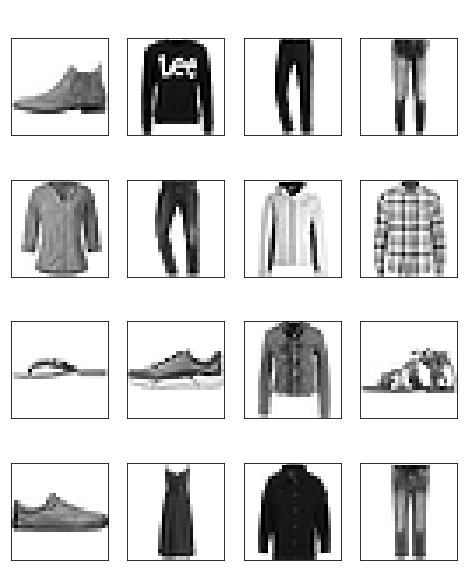

In [9]:
i = 0
fig = plt.figure(figsize=(8,10))
for idx in range(16):
  image = test_images[idx]
  plt.subplot(4, 4, i+1)
  plt.imshow(image,  cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,  cmap=plt.cm.binary)
  title = ("%s%s%s%s%s"%("True: ", class_names[test_labels[idx]], "\n", "Pred: ", class_names[np.argmax(classifications[idx])]))
  plt.title(title, fontsize=12, color='white')
  i+=1
plt.show()